# 💣 BombCell Parameter Effects Guide 💣

This notebook demonstrates how changing individual parameter values affects unit classification.
Each parameter is explored in its own cell with visualizations showing the impact.

## 📋 Table of Contents

### 1. Setup & Data Loading
   - Import libraries
   - Load session data
   - Run baseline analysis

### 2. Waveform-Based Parameters (Noise Classification)
   - **2.1** Number of Peaks (maxNPeaks)
   - **2.2** Number of Troughs (maxNTroughs)
   - **2.3** Waveform Duration (minWvDuration, maxWvDuration)
   - **2.4** Baseline Flatness (maxWvBaselineFraction)
   - **2.5** Spatial Decay Slope (minSpatialDecaySlopeExp, maxSpatialDecaySlopeExp)
   - **2.6** Second Peak to Trough Ratio (maxScndPeakToTroughRatio_noise)

### 3. Non-Somatic Parameters
   - **3.1** Trough to Peak2 Ratio (minTroughToPeak2Ratio_nonSomatic)
   - **3.2** Peak1 to Peak2 Ratio (maxPeak1ToPeak2Ratio_nonSomatic)
   - **3.3** Main Peak to Trough Ratio (maxMainPeakToTroughRatio_nonSomatic)
   - **3.4** Width Thresholds (minWidthFirstPeak_nonSomatic, minWidthMainTrough_nonSomatic)

### 4. Amplitude & SNR Parameters (MUA Classification)
   - **4.1** Minimum Amplitude (minAmplitude)
   - **4.2** Minimum SNR (minSNR)

### 5. Spike Train Quality Parameters (MUA Classification)
   - **5.1** Refractory Period Violations (maxRPVviolations)
   - **5.2** Refractory Period Window (tauR_valuesMin, tauR_valuesMax)
   - **5.3** Presence Ratio (minPresenceRatio)
   - **5.4** Percentage Spikes Missing (maxPercSpikesMissing)
   - **5.5** Minimum Spike Count (minNumSpikes)
   - **5.6** Maximum Drift (maxDrift)

### 6. Distance Metric Parameters (Optional)
   - **6.1** Isolation Distance (isoDmin)
   - **6.2** L-ratio (lratioMax)

### 7. Summary & Recommendations
   - Best practices for parameter selection
   - Dataset-specific considerations

---

# 1. Setup & Data Loading

## 1.1 Import Libraries

In [3]:
import os
import sys
from pathlib import Path
from pprint import pprint
from copy import deepcopy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Import BombCell
import bombcell as bc

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


## 1.2 Load Session Data

Load your Kilosort session:

In [31]:
from pathlib import Path
import sys
import numpy as np
import pandas as pd
import bombcell as bc

analysis_dir = Path.cwd().resolve()
sys.path.insert(0, str(analysis_dir))
from post_analysis_setup import load_post_analysis_context

CONFIG_FILE = r'C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json'
BASELINE_CONFIG_FILE = r'C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json'
RUN_MODE = 'single_probe'   # batch | single_probe | np20_rerun | single_probe_date
TARGET_PROBE = 'D'   # A-F

if Path(CONFIG_FILE).exists():
    print(f"Using config file: {CONFIG_FILE}")
else:
    raise FileNotFoundError(f"Config file not found: {CONFIG_FILE}")
if Path(BASELINE_CONFIG_FILE).exists():
    print(f"Using baseline config file: {BASELINE_CONFIG_FILE}")    
else:
    raise FileNotFoundError(f"Baseline config file not found: {BASELINE_CONFIG_FILE}")

Using config file: C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json
Using baseline config file: C:\Users\user\Documents\github\bombcell\py_bombcell\grant\configs\grant_recording_config_reach15_20260201_session007_single_probe.json


### Load baseline context

In [41]:
from post_analysis_setup import load_post_analysis_context
globals().update(load_post_analysis_context(BASELINE_CONFIG_FILE))
print(f'==================== BASELINE CONFIG LOADED ====================')
print('Loaded config for', NP_recording_name)

ctx = load_post_analysis_context(CONFIG_FILE)
mode_to_roots = {
    'batch': (ctx['DEFAULT_KS_STAGING_ROOT'], ''),
    'np20_rerun': (ctx['NP20_KS_STAGING_ROOT'], ''),
    'single_probe': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT'], ''),
    'single_probe_date': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT_DATE'], ''),
}

staging_root, save_subdir = mode_to_roots[RUN_MODE]
baseline_ks_dir = Path(staging_root) / f'kilosort4_{TARGET_PROBE}'
baseline_save_path = baseline_ks_dir / 'bombcell' / save_subdir

print(f"KS Dir: {baseline_ks_dir}")
print(f"Save Path: {baseline_save_path}")

PROBE_DIRS = ctx['PROBE_DIRS']
STRUCTURE_OEBIN = ctx['STRUCTURE_OEBIN']

# Optional per-notebook convenience aliases
probeA_Dir = str(PROBE_DIRS['A'])
probeB_Dir = str(PROBE_DIRS['B'])
probeC_Dir = str(PROBE_DIRS['C'])
probeD_Dir = str(PROBE_DIRS['D'])
probeE_Dir = str(PROBE_DIRS['E'])
probeF_Dir = str(PROBE_DIRS['F'])
structur_oebin = str(STRUCTURE_OEBIN)
continuousDir_baseline = [str(CONTINUOUS_DAT_PATHS[p]) for p in ['A','B','C','D','E','F']]
continuousDirs_baseline = continuousDir_baseline  # backwards-compatible alias
probeLetters = ['A','B','C','D','E','F']
continuousDirs_baseline

#
raw_file_path_baseline = continuousDirs_baseline[ord(TARGET_PROBE) - ord('A')]
print(f"Raw data file for probe {TARGET_PROBE}: {raw_file_path_baseline}")

# Results directory for the target probe
# correctly combine paths to cretate results_dir
results_dir_baseline = baseline_save_path 
print(f"Results directory for probe {TARGET_PROBE}: {results_dir_baseline}")

meta_file_path_baseline = structur_oebin
print(f'==============================================================')
#check for existence of files
if not Path(raw_file_path_baseline).exists():
    raise FileNotFoundError(f"Raw data file not found: {raw_file_path_baseline}")
if not Path(meta_file_path_baseline).exists():
    raise FileNotFoundError(f"Meta data file not found: {meta_file_path_baseline}")
if not baseline_ks_dir.exists():
    raise FileNotFoundError(f"Kilosort directory not found: {baseline_ks_dir}")  
if not Path(results_dir_baseline).exists():
    raise FileNotFoundError(f"Results directory not found: {results_dir_baseline}")
print(f"All necessary files found.")

==================== BASELINE CONFIG LOADED ====================
Loaded config for Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00
KS Dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
Save Path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bombcell
Raw data file for probe D: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD\continuous.dat
Results directory for probe D: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bombcell
All necessary files found.


## Load specific BC run

In [42]:
from post_analysis_setup import load_post_analysis_context
globals().update(load_post_analysis_context(CONFIG_FILE))
print(f'==================== NEW CONFIG LOADED ====================')

print('Loaded config for', NP_recording_name)

ctx = load_post_analysis_context(CONFIG_FILE)
mode_to_roots = {
    'batch': (ctx['DEFAULT_KS_STAGING_ROOT'], ''),
    'np20_rerun': (ctx['NP20_KS_STAGING_ROOT'], ''),
    'single_probe': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT'], ''),
    'single_probe_date': (ctx['BOMBCELL_KS_SINGLEPROBE_STAGING_ROOT_DATE'], ''),
}

staging_root, save_subdir = mode_to_roots[RUN_MODE]
ks_dir = Path(staging_root) / f'kilosort4_{TARGET_PROBE}'
save_path = ks_dir / 'bombcell' / save_subdir

print('ks_dir:', ks_dir)
print('save_path:', save_path)
PROBE_DIRS = ctx['PROBE_DIRS']
STRUCTURE_OEBIN = ctx['STRUCTURE_OEBIN']

# Optional per-notebook convenience aliases
probeA_Dir = str(PROBE_DIRS['A'])
probeB_Dir = str(PROBE_DIRS['B'])
probeC_Dir = str(PROBE_DIRS['C'])
probeD_Dir = str(PROBE_DIRS['D'])
probeE_Dir = str(PROBE_DIRS['E'])
probeF_Dir = str(PROBE_DIRS['F'])
structur_oebin = str(STRUCTURE_OEBIN)
continuousDir = [str(CONTINUOUS_DAT_PATHS[p]) for p in ['A','B','C','D','E','F']]
continuousDirs = continuousDir  # backwards-compatible alias
probeLetters = ['A','B','C','D','E','F']
continuousDirs

#
raw_file_path = continuousDirs[ord(TARGET_PROBE) - ord('A')]
print(f"Raw data file for probe {TARGET_PROBE}: {raw_file_path}")

# Results directory for the target probe
# correctly combine paths to cretate results_dir
results_dir = save_path 
print(f"Results directory for probe {TARGET_PROBE}: {results_dir}")

meta_file_path = structur_oebin
print(f'==============================================================')
#check for existence of files
if not Path(raw_file_path).exists():
    raise FileNotFoundError(f"Raw data file not found: {raw_file_path}")
if not Path(meta_file_path).exists():
    raise FileNotFoundError(f"Meta data file not found: {meta_file_path}")
if not ks_dir.exists():
    raise FileNotFoundError(f"Kilosort directory not found: {ks_dir}")  
if not Path(results_dir).exists():
    raise FileNotFoundError(f"Results directory not found: {results_dir}")
print(f"All necessary files found.")

==================== NEW CONFIG LOADED ====================
Loaded config for Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00
ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bombcell
Raw data file for probe D: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD\continuous.dat
Results directory for probe D: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bombcell
All necessary files found.


In [43]:
print("TARGET_PROBE:", TARGET_PROBE)  # New Code
print('==============================')
print('')
print("ks_dir:", ks_dir)  # New Code
print('baseline_ks_dir:', baseline_ks_dir)  # New Code
print("raw_file_path:", raw_file_path)  # New Code
print("meta_file_path:", meta_file_path)  # New Code
print("save_path:", save_path)  # New Code
print("results_dir:", results_dir)  # New Code



TARGET_PROBE: D

ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
baseline_ks_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
raw_file_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\continuous\Neuropix-PXI-100.ProbeD\continuous.dat
meta_file_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\Record Node 103\experiment1\recording1\structure.oebin
save_path: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bombcell
results_dir: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session0

In [45]:
# Load saved BombCell results
bombcell_dir = Path(ks_dir) / "bombcell" / "bombcell_single_probe" / "single_probe_results" / f"Probe_{TARGET_PROBE}"

import json

# load Probe_B_quality_metrics.csv
csv_path = Path(results_dir) / f"Probe_{TARGET_PROBE}_quality_metrics.csv"
if csv_path.exists():
    df_csv = pd.read_csv(csv_path)
    print(f"✅ Loaded quality metrics from CSV for probe {TARGET_PROBE}, shape: {df_csv.shape}")
    # Optionally, you can convert the DataFrame to a dictionary of numpy arrays
    quality_metrics = {col: df_csv[col].to_numpy() for col in df_csv.columns}
else:
    print(f"⚠️ CSV file for probe {TARGET_PROBE} not found at {csv_path}")

# Load unit classifications
with open(results_dir / f"Probe_{TARGET_PROBE}_param.json", 'r') as f:
    saved_params = json.load(f)

print(f"✅ Loaded {len(quality_metrics.get('rawAmplitude', []))} units from saved results")

✅ Loaded quality metrics from CSV for probe D, shape: (820, 31)
✅ Loaded 820 units from saved results


## 1.3 Run Baseline Analysis

Run BombCell with default parameters to establish baseline:

In [57]:
run_bombcell = False
if run_bombcell:
 # Get default parameters
    baseline_param = bc.get_default_parameters(
        baseline_ks_dir,
        raw_file=raw_file_path_baseline,
        meta_file=meta_file_path_baseline,
        kilosort_version=4
    )

    # Disable plotting for parameter sweeps
    baseline_param["plotGlobal"] = False
    baseline_param["savePlots"] = False
    baseline_param["verbose"] = False

    # Run BombCell
    print("Running baseline analysis with default parameters...")
    baseline_qm, baseline_unit_type, baseline_unit_type_string = bc.run_bombcell(baseline_param)

    # Load ephys data
    (
        spike_templates,
        spike_clusters,
        template_waveforms,
        channel_positions,
        cluster_ids,
        spike_times,
        spike_amplitudes
    ) = bc.load_ephys_data(baseline_ks_dir)

    print(f"\n✅ Baseline analysis complete!")
    print(f"   Total units: {len(baseline_unit_type)}")

    # Show baseline classification
    unique_types, counts = np.unique(baseline_unit_type_string, return_counts=True)
    print("\n📊 Baseline Classification:")
    for utype, count in zip(unique_types, counts):
        print(f"   {utype:20s}: {count:4d} ({count/len(baseline_unit_type)*100:5.1f}%)")

## 1.4 Helper Functions for Parameter Sweeps

In [58]:
def run_with_param(ks_dir, save_path, param, param_name, param_value):
    from copy import deepcopy
    from pathlib import Path
    import os
    from joblib import parallel_backend

    ks_dir = Path(ks_dir)
    save_path = Path(save_path)

    run_save_path = save_path / f"{param_name}_{param_value}"
    run_save_path.mkdir(parents=True, exist_ok=True)

    joblib_tmp = run_save_path / "_joblib_tmp"
    joblib_tmp.mkdir(parents=True, exist_ok=True)
    os.environ["JOBLIB_TEMP_FOLDER"] = str(joblib_tmp)

    test_param = deepcopy(param)
    test_param[param_name] = param_value

    with parallel_backend("threading", n_jobs=1):
        out = bc.run_bombcell(str(ks_dir), str(run_save_path), test_param)

    # BombCell version-dependent return signature; these indices match your earlier successful unpacking intent
    unit_type = out[1]
    unit_type_string = out[2]
    return unit_type_string





def plot_param_sweep(param_values, results, param_name, param_units=""):
    """
    Plot how unit classifications change with parameter value.
    
    Parameters
    ----------
    param_values : list
        List of parameter values tested
    results : list
        List of classification results for each parameter value
    param_name : str
        Name of parameter being swept
    param_units : str
        Units for parameter (e.g., 'µV', 'ms')
    """
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # Get all unique classification types
    all_types = set()
    for result in results:
        all_types.update(result)
    all_types = sorted(list(all_types))
    
    # Count units of each type for each parameter value
    type_counts = {t: [] for t in all_types}
    for result in results:
        unique, counts = np.unique(result, return_counts=True)
        count_dict = dict(zip(unique, counts))
        for t in all_types:
            type_counts[t].append(count_dict.get(t, 0))
    
    # Plot 1: Absolute counts
    colors = {'NOISE': 'red', 'GOOD': 'green', 'MUA': 'orange', 
              'NON-SOMA': 'blue', 'NON-SOMA GOOD': 'cyan', 'NON-SOMA MUA': 'purple'}
    
    for t in all_types:
        color = colors.get(t, 'gray')
        ax1.plot(param_values, type_counts[t], 'o-', label=t, color=color, linewidth=2, markersize=6)
    
    ax1.set_xlabel(f'{param_name} {param_units}', fontsize=12)
    ax1.set_ylabel('Number of units', fontsize=12)
    ax1.set_title(f'Effect of {param_name} on Unit Classification (Absolute Counts)', fontsize=14)
    ax1.legend(loc='best')
    ax1.grid(True, alpha=0.3)
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    
    # Plot 2: Percentages (stacked area)
    percentages = np.array([np.array(list(type_counts.values()))[:, i] / len(results[i]) * 100 
                           for i in range(len(param_values))]).T
    
    ax2.stackplot(param_values, *percentages, 
                  labels=all_types,
                  colors=[colors.get(t, 'gray') for t in all_types],
                  alpha=0.7)
    
    ax2.set_xlabel(f'{param_name} {param_units}', fontsize=12)
    ax2.set_ylabel('Percentage of units (%)', fontsize=12)
    ax2.set_title(f'Effect of {param_name} on Unit Classification (Percentages)', fontsize=14)
    ax2.legend(loc='best')
    ax2.set_ylim([0, 100])
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary
    print(f"\n�� Parameter Sweep Summary for {param_name}:")
    print(f"   Range tested: {min(param_values)} - {max(param_values)} {param_units}")
    print(f"   Number of values: {len(param_values)}")
    print(f"\n   Classification changes:")
    for t in all_types:
        min_count = min(type_counts[t])
        max_count = max(type_counts[t])
        print(f"      {t:15s}: {min_count:4d} - {max_count:4d} units")

print("✅ Helper functions defined!")

✅ Helper functions defined!


---
# 2. Waveform-Based Parameters (Noise Classification)

These parameters determine whether units are classified as NOISE based on waveform shape.

## 2.1 Maximum Number of Peaks (maxNPeaks)

**Purpose:** Classify units with too many peaks as noise (likely artifacts or multi-unit activity).

**Default value:** 2

**Effect:**
- Lower values (1): Stricter - only single-peak waveforms pass
- Higher values (3+): More permissive - allows complex waveforms

**Recommendation:** Most somatic units have 1-2 peaks. Use default (2) unless you have specific reason to change.

Testing maxNPeaks parameter...

   Running with maxNPeaks=1...
🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
Results will be saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_1

Loading ephys data...
Loaded ephys data: 820 units, 59,026,802 spikes

🔍 Extracting raw waveforms...
Loading file H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_1\templates._bc_rawWaveforms.npy... Done!
No splits/merges detected

⚙️ Computing quality metrics for 820 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/820 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_1\for_GUI\gui_data.pkl
   Generated spatial decay fits: 818/820 units
   Generated amplitude fits: 818/820 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...
Sample of quality metrics table:
  unit_type Original ID # peaks # troughs waveform duration baseline flatness  \
0     NOISE           0    True     False             False             False   
1  NON-SOMA           1   False     False             False             False   
2     NOISE           2    True      True             False             False   
3     NOISE           3    True     False             False             False   
4     NOISE           4    True     False             False             False   

  peak2 / trough spatial decay % sp

c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

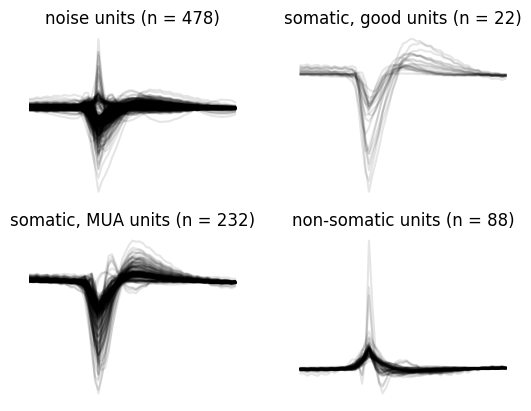

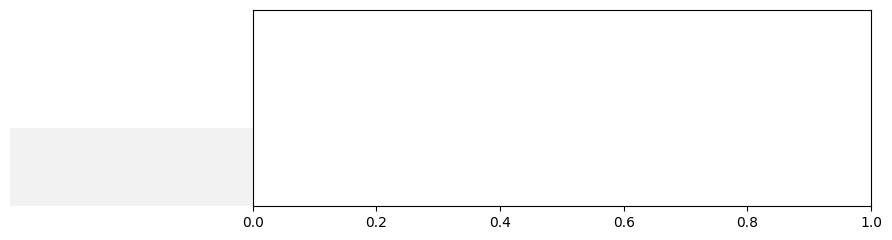

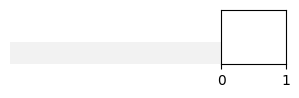

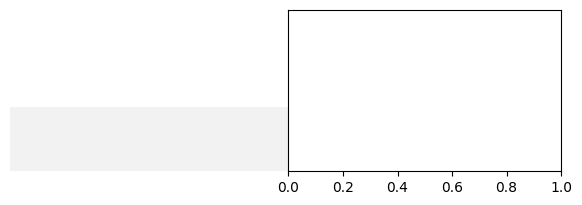

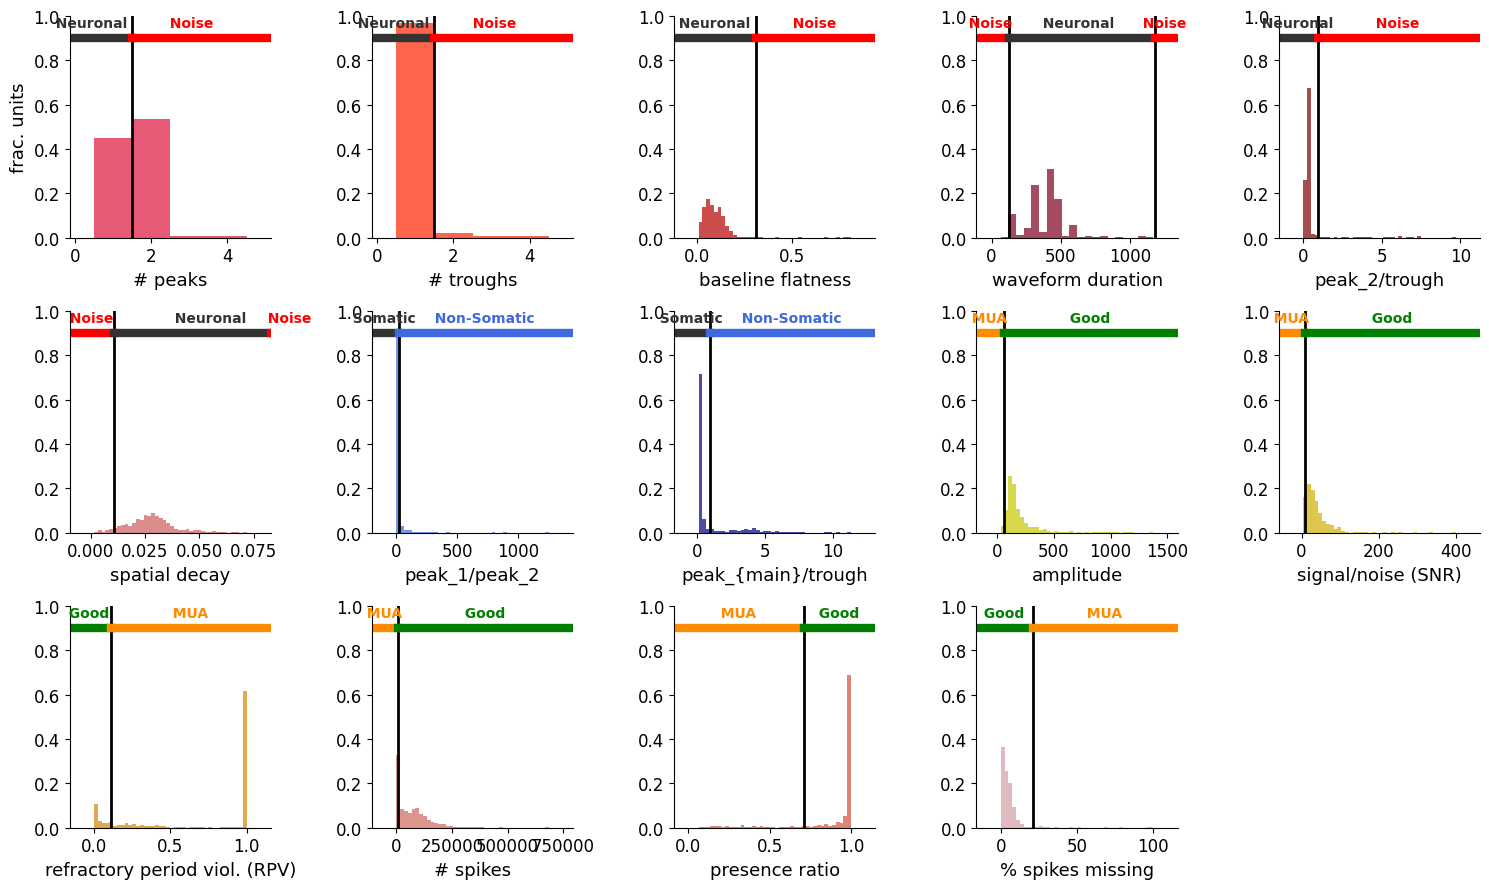


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
All expected metrics were successfully saved.
   Running with maxNPeaks=2...
🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
Results will be saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_2

Loading ephys data...
Loaded ephys data: 820 units, 59,026,802 spikes

🔍 Extracting raw waveforms...


0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elaps


⚙️ Computing quality metrics for 820 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/820 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_2\for_GUI\gui_data.pkl
   Generated spatial decay fits: 818/820 units
   Generated amplitude fits: 818/820 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...
Sample of quality metrics table:
  unit_type Original ID # peaks # troughs waveform duration baseline flatness  \
0  NON-SOMA           0   False     False             False             False   
1  NON-SOMA           1   False     False             False             False   
2     NOISE           2    True      True             False             False   
3      GOOD           3   False     False             False             False   
4      GOOD           4   False     False             False             False   

  peak2 / trough spatial decay % sp

c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

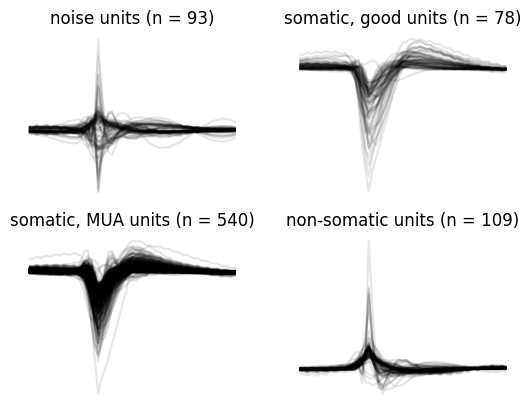

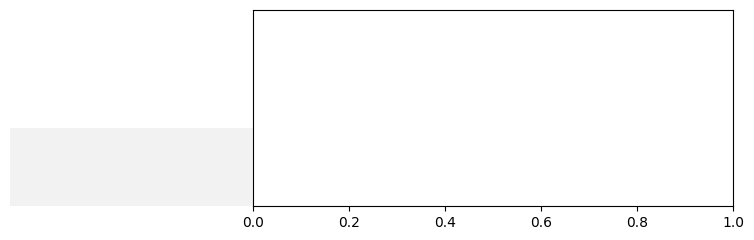

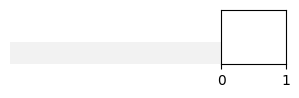

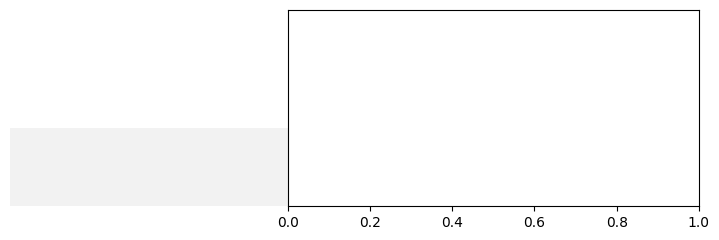

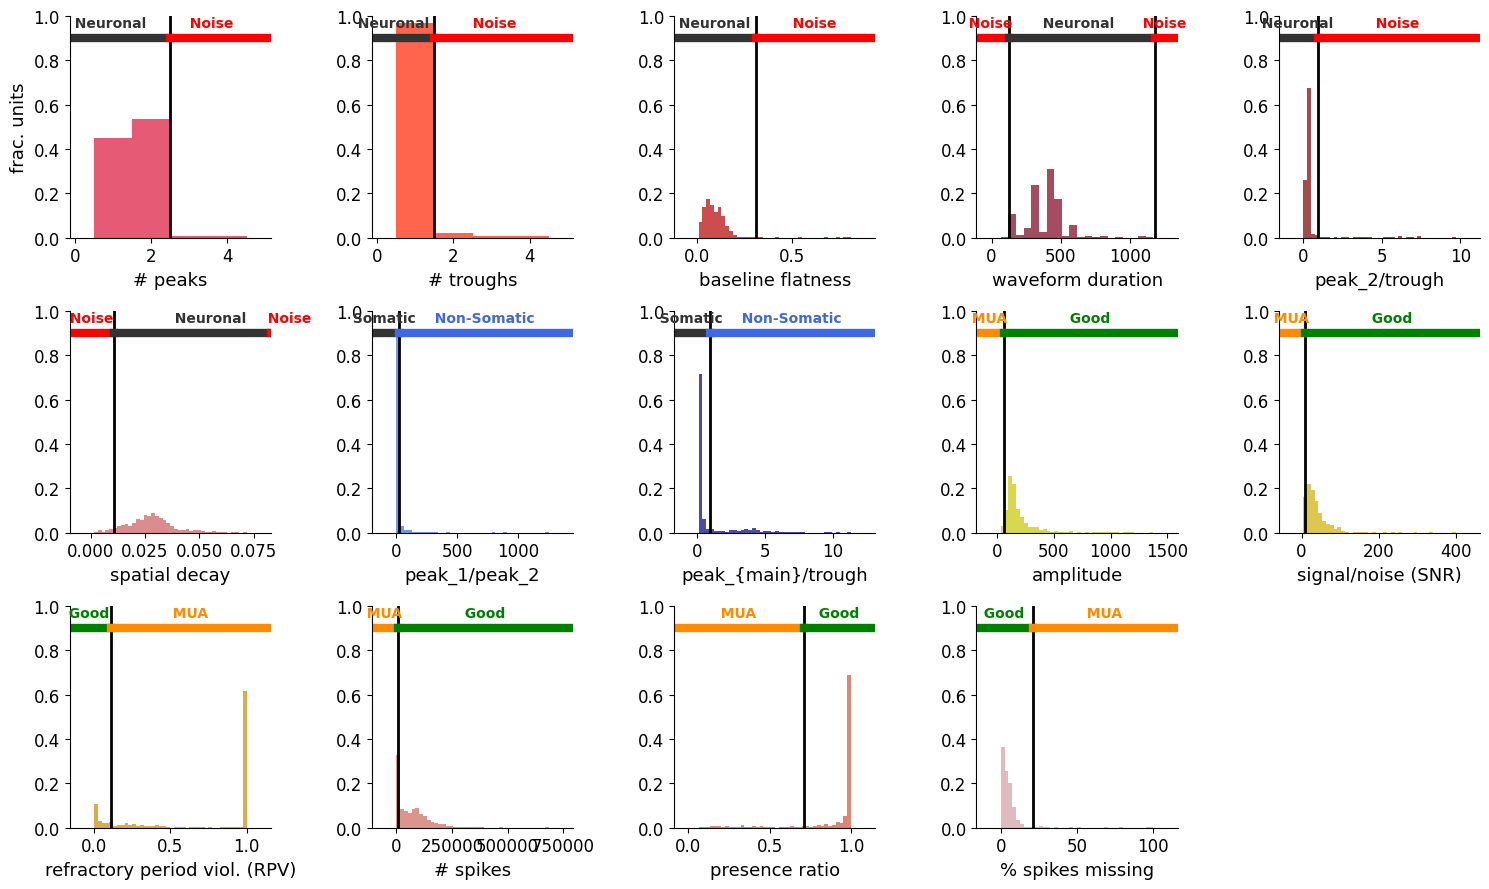


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
All expected metrics were successfully saved.
   Running with maxNPeaks=3...
🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
Results will be saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_3

Loading ephys data...
Loaded ephys data: 820 units, 59,026,802 spikes

🔍 Extracting raw waveforms...


0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elaps


⚙️ Computing quality metrics for 820 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/820 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_3\for_GUI\gui_data.pkl
   Generated spatial decay fits: 818/820 units
   Generated amplitude fits: 818/820 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...
Sample of quality metrics table:
  unit_type Original ID # peaks # troughs waveform duration baseline flatness  \
0  NON-SOMA           0   False     False             False             False   
1  NON-SOMA           1   False     False             False             False   
2     NOISE           2   False      True             False             False   
3      GOOD           3   False     False             False             False   
4      GOOD           4   False     False             False             False   

  peak2 / trough spatial decay % sp

c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

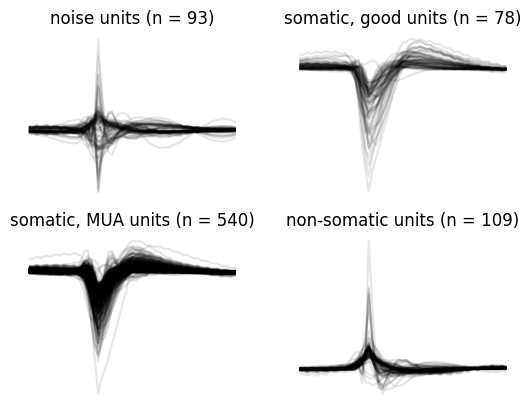

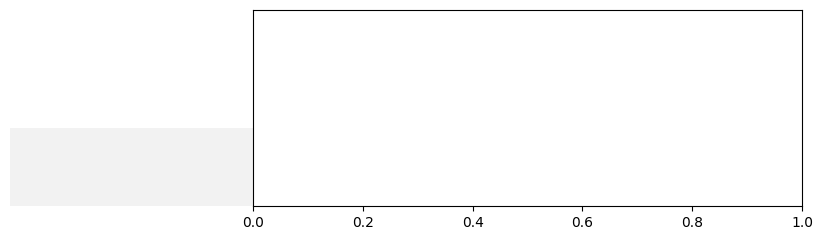

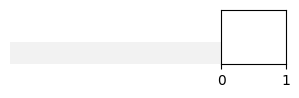

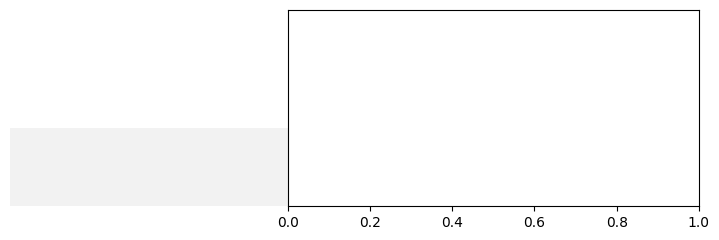

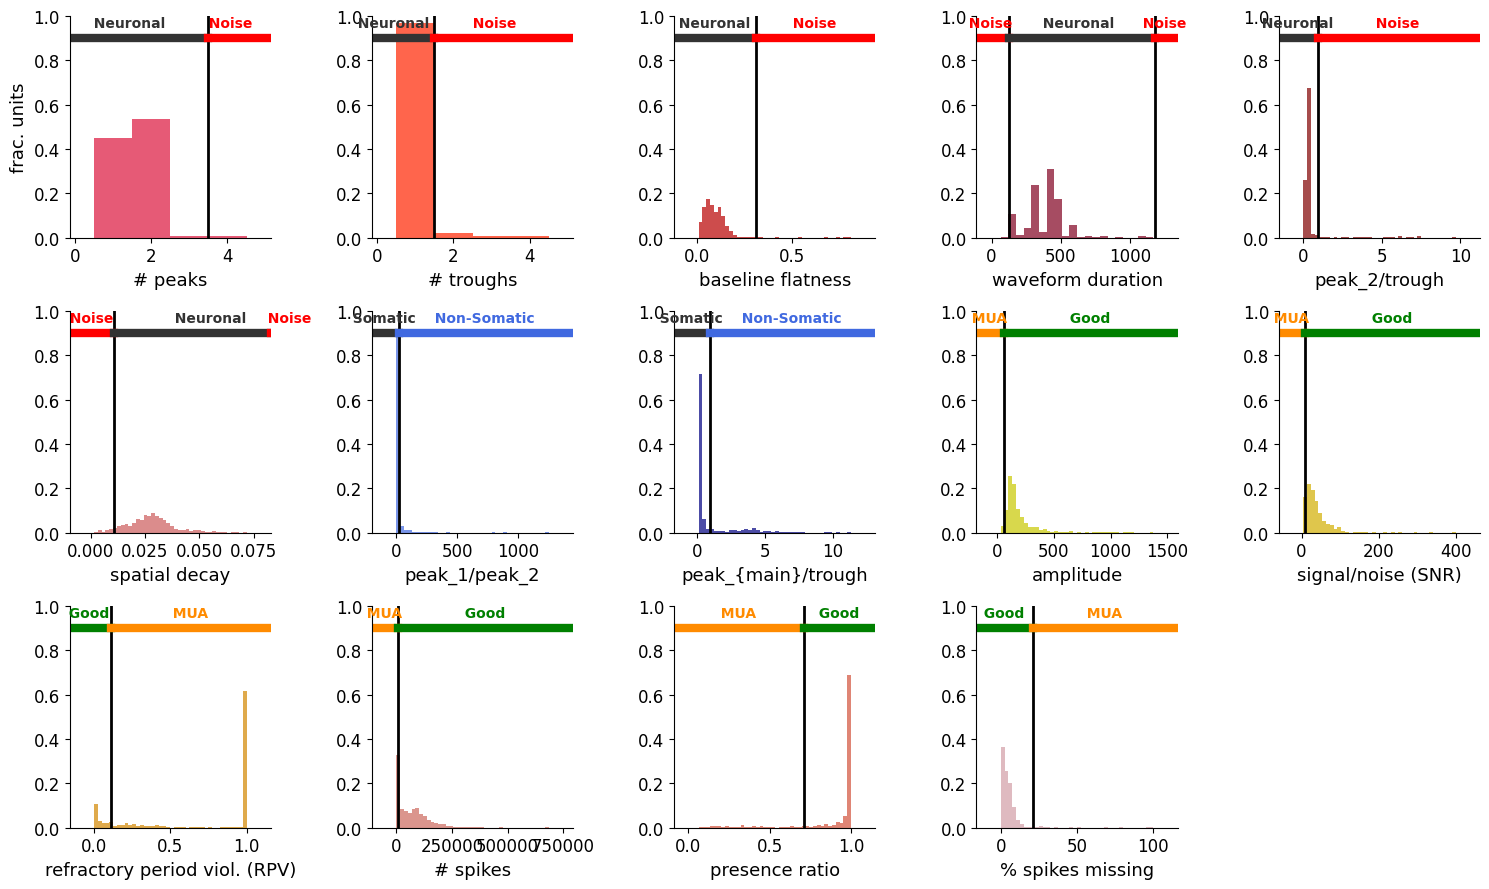


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
All expected metrics were successfully saved.
   Running with maxNPeaks=4...
🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
Results will be saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_4

Loading ephys data...
Loaded ephys data: 820 units, 59,026,802 spikes

🔍 Extracting raw waveforms...


0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elaps


⚙️ Computing quality metrics for 820 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/820 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_4\for_GUI\gui_data.pkl
   Generated spatial decay fits: 818/820 units
   Generated amplitude fits: 818/820 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...
Sample of quality metrics table:
  unit_type Original ID # peaks # troughs waveform duration baseline flatness  \
0  NON-SOMA           0   False     False             False             False   
1  NON-SOMA           1   False     False             False             False   
2     NOISE           2   False      True             False             False   
3      GOOD           3   False     False             False             False   
4      GOOD           4   False     False             False             False   

  peak2 / trough spatial decay % sp

c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

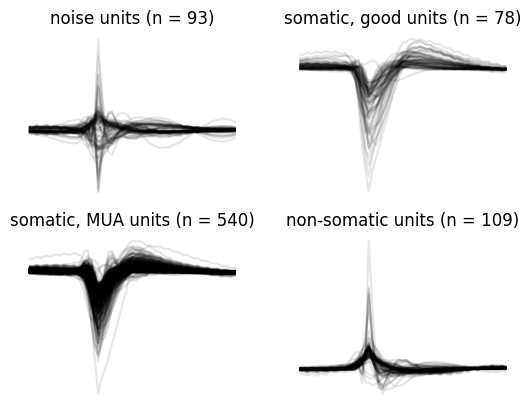

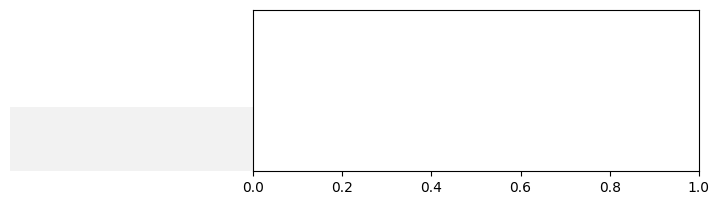

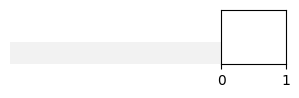

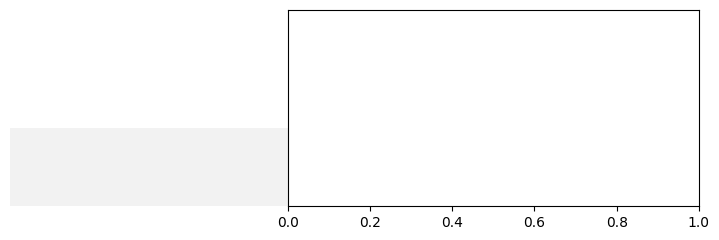

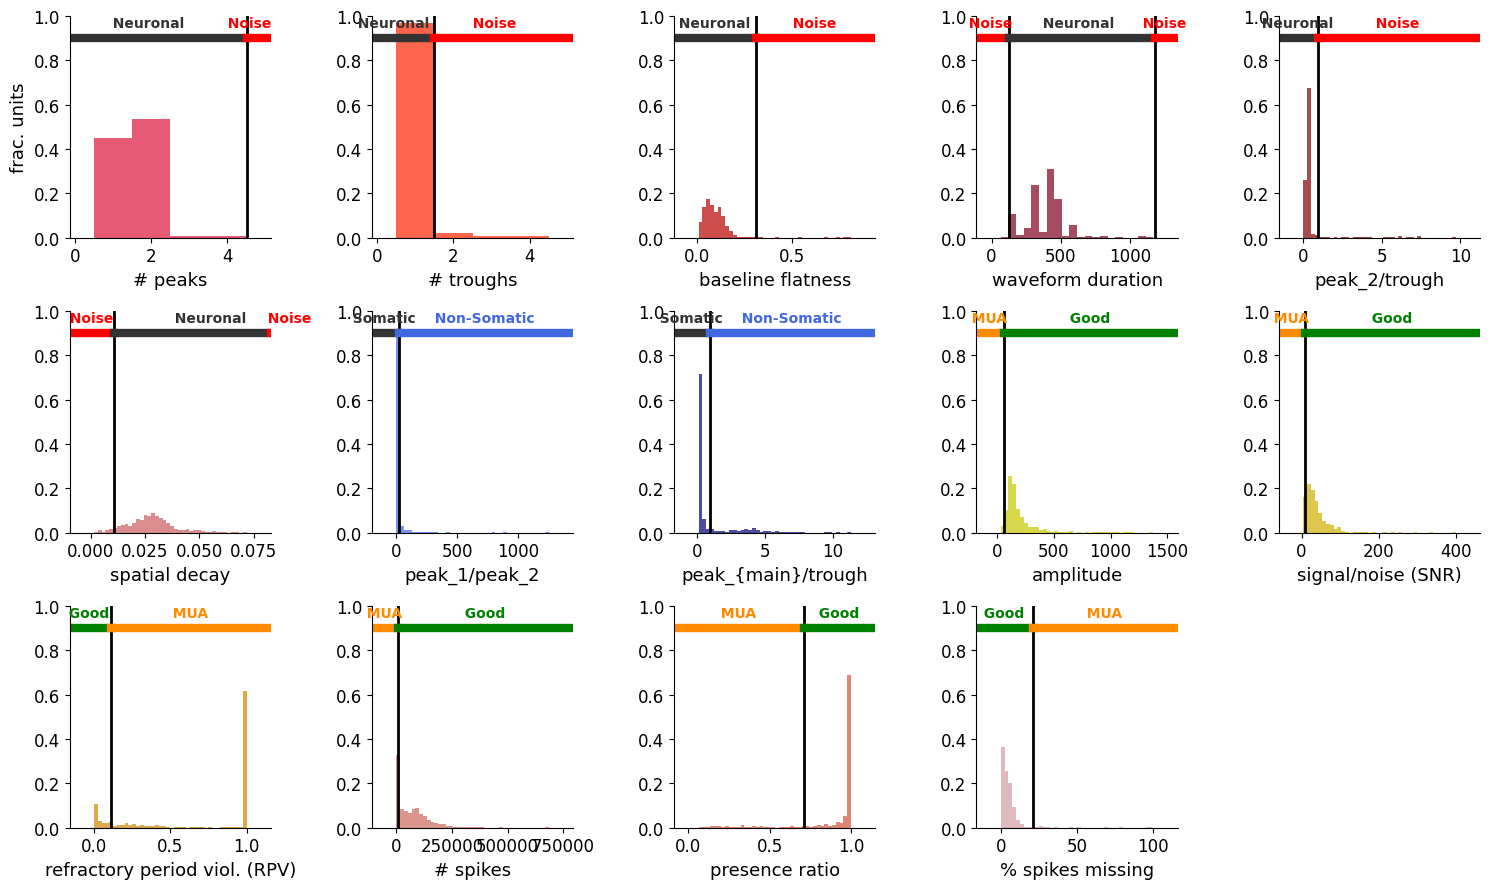


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
All expected metrics were successfully saved.
   Running with maxNPeaks=5...
🚀 Starting BombCell quality metrics pipeline...
📁 Processing data from: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
Results will be saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_5

Loading ephys data...
Loaded ephys data: 820 units, 59,026,802 spikes

🔍 Extracting raw waveforms...


0it [00:00, ?it/s]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 113 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 149 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 189 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 233 tasks      | elaps


⚙️ Computing quality metrics for 820 units...
   (Progress bar will appear below)


Computing bombcell quality metrics:   0%|          | 0/820 units


Saving GUI visualization data...
GUI visualization data saved to: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D\bc_parameter_testing\maxNPeaks_5\for_GUI\gui_data.pkl
   Generated spatial decay fits: 818/820 units
   Generated amplitude fits: 818/820 units

🏷️ Classifying units (good/MUA/noise/non-soma)...

Generating summary plots...
Sample of quality metrics table:
  unit_type Original ID # peaks # troughs waveform duration baseline flatness  \
0  NON-SOMA           0   False     False             False             False   
1  NON-SOMA           1   False     False             False             False   
2     NOISE           2   False      True             False             False   
3      GOOD           3   False     False             False             False   
4      GOOD           4   False     False             False             False   

  peak2 / trough spatial decay % sp

c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:795: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  styles["linewidth"].fillna(1, inplace=True)
c:\Users\user\anaconda3\envs\bombcell\Lib\site-packages\upsetplot\plotting.py:796: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series

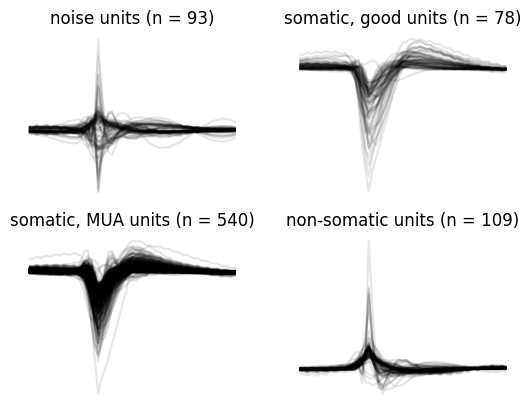

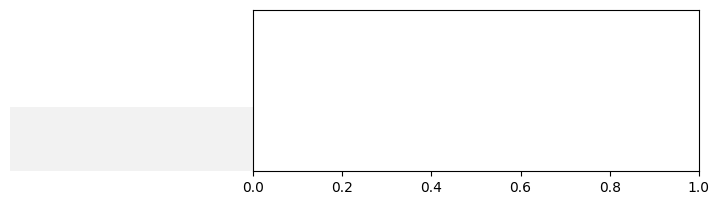

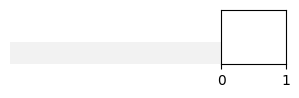

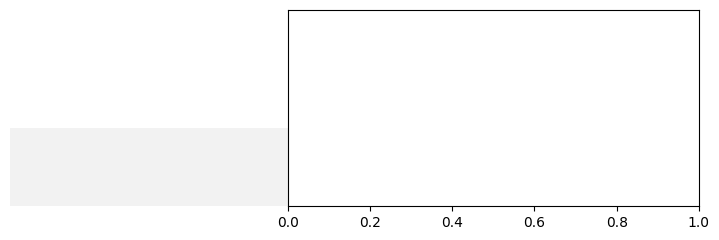

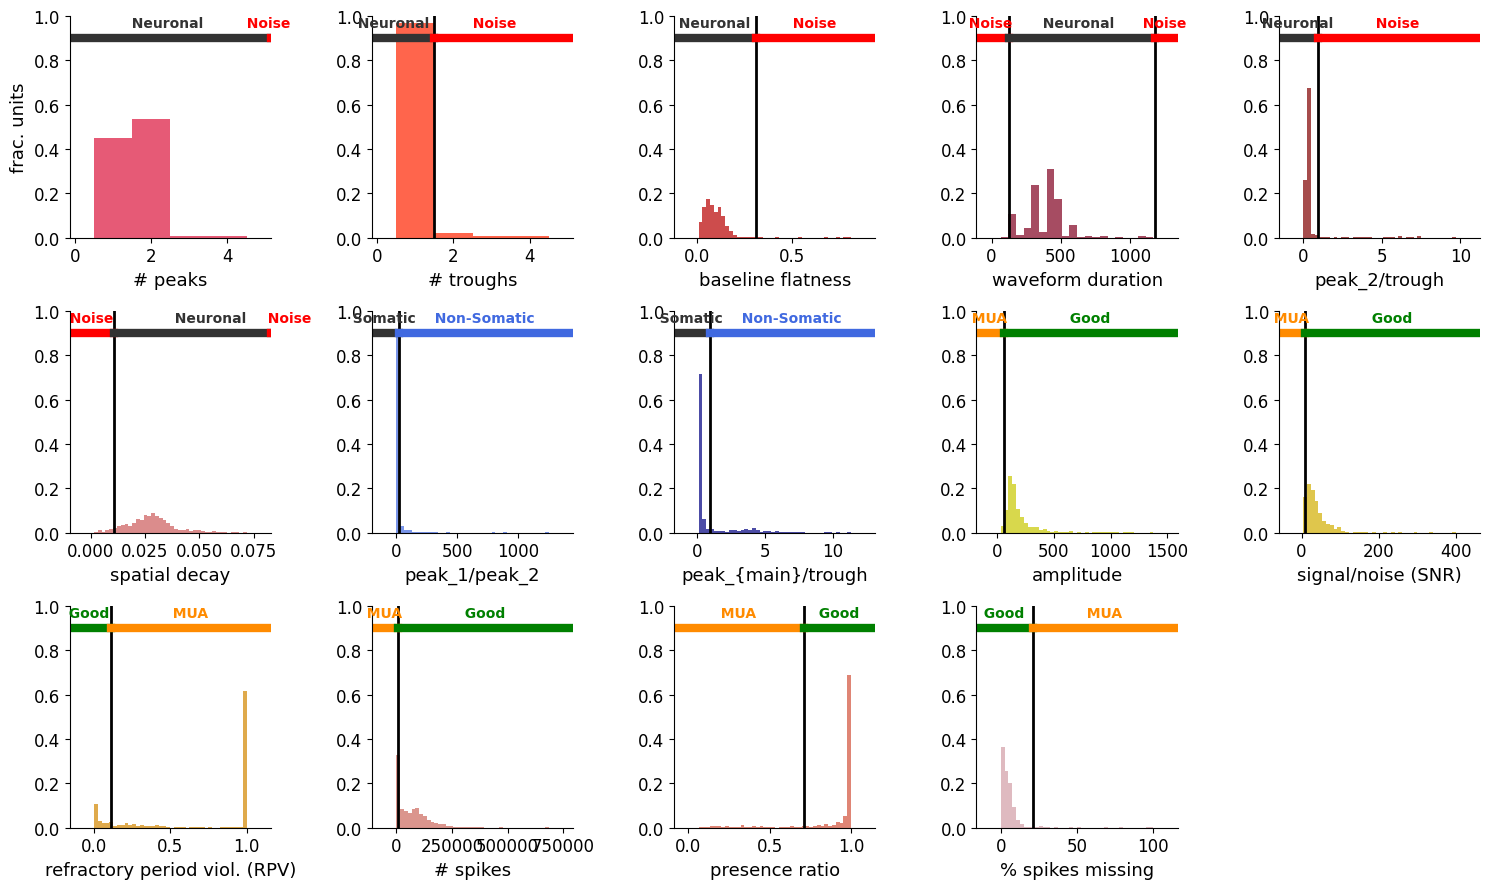


Saving results...
📁 Saving TSV files to Kilosort directory: H:\Grant\Neuropixels\Kilosort_Recordings\Reach15_20260201_session007_NP_Recording_Number02_2026-02-01_18-25-00\bombcell\bombcell_single_probe\kilosort4_D
All expected metrics were successfully saved.


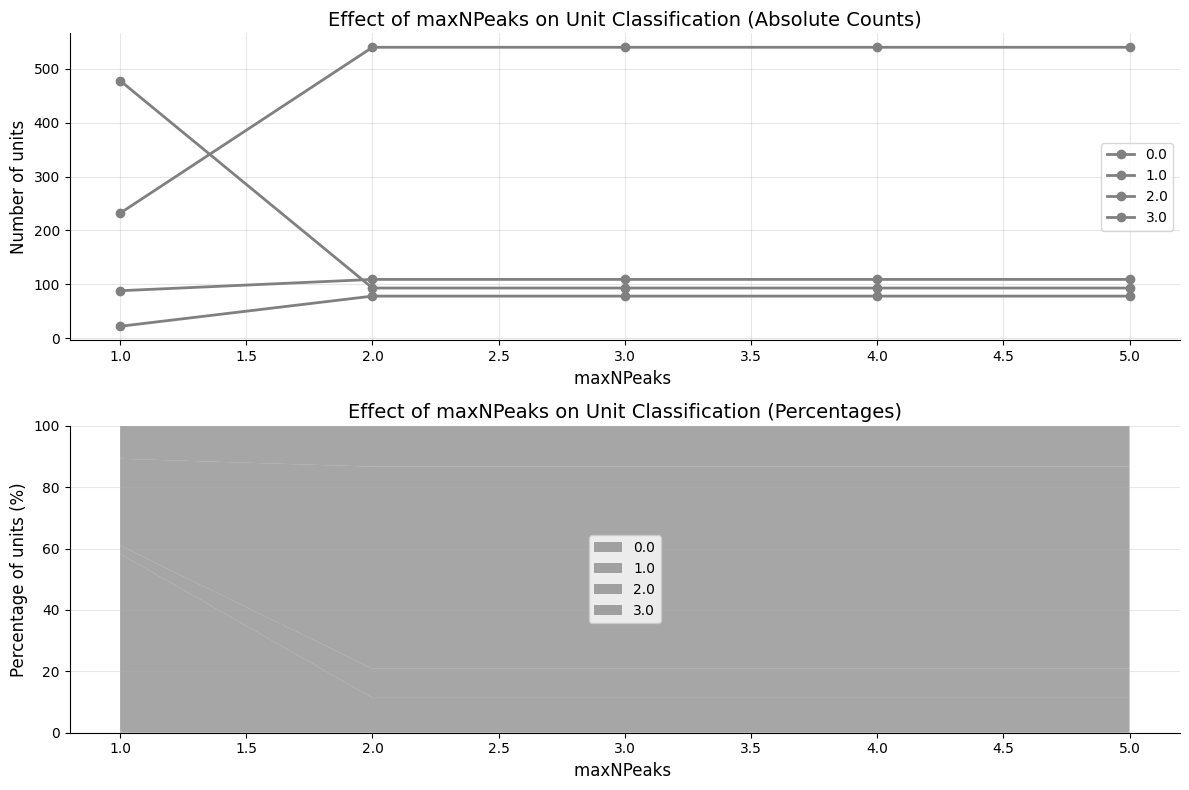


�� Parameter Sweep Summary for maxNPeaks:
   Range tested: 1 - 5 
   Number of values: 5

   Classification changes:


ValueError: Unknown format code 's' for object of type 'float'

In [59]:
# Test different maxNPeaks values
print("Testing maxNPeaks parameter...\n")

save_path = baseline_ks_dir / 'bc_parameter_testing'
# new code:
param_name = "maxNPeaks"
param_values = [1, 2, 3, 4, 5]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_ks_dir, save_path, baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="")

print("\n💡 Interpretation:")
print("   - As maxNPeaks increases, fewer units classified as NOISE")
print("   - Most biphasic waveforms have 2 peaks")
print("   - Default value (2) works well for most datasets")

## 2.2 Maximum Number of Troughs (maxNTroughs)

**Purpose:** Classify units with too many troughs as noise.

**Default value:** 1

**Effect:**
- Value of 1: Only units with single clear trough pass
- Higher values: Allow more complex waveforms

**Recommendation:** Keep at 1 for typical extracellular recordings.

In [ ]:
# Test different maxNTroughs values
print("Testing maxNTroughs parameter...\n")

param_name = "maxNTroughs"
param_values = [1, 2, 3]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="")

print("\n💡 Interpretation:")
print("   - Typical extracellular spikes have 1 main trough")
print("   - Multiple troughs usually indicate artifacts")
print("   - Default value (1) is recommended")

## 2.3 Waveform Duration (minWvDuration, maxWvDuration)

**Purpose:** Filter units with unrealistic waveform durations (too fast or too slow).

**Default values:** 
- minWvDuration: 100 µs
- maxWvDuration: 1150 µs

**Effect:**
- Narrower range: More stringent filtering
- Wider range: More permissive

**Typical durations:**
- Fast-spiking interneurons: 200-400 µs
- Regular spiking neurons: 400-800 µs
- Wide-spiking neurons: 800-1000 µs

**Recommendation:** Default range covers all realistic neuronal waveforms.

In [ ]:
# Test different waveform duration ranges
print("Testing waveform duration parameters...\n")

# Test maxWvDuration
param_name = "maxWvDuration"
param_values = [800, 1000, 1150, 1300, 1500]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val} µs...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="µs")

print("\n💡 Interpretation:")
print("   - Lower maxWvDuration: Excludes wide-spiking neurons")
print("   - Higher maxWvDuration: May include some noise units")
print("   - Most cortical neurons: 300-1000 µs")
print("   - Hippocampal pyramidal: can reach 1000-1200 µs")

## 2.4 Baseline Flatness (maxWvBaselineFraction)

**Purpose:** Detect noisy units with high baseline fluctuations.

**Default value:** 0.3 (30% of peak amplitude)

**Effect:**
- Lower values (0.1-0.2): Stricter - requires very flat baseline
- Higher values (0.4-0.5): More permissive - allows noisier baselines

**Recommendation:** 0.3 works well. Lower for high-quality recordings, higher for noisier data.

In [ ]:
# Test different baseline flatness thresholds
print("Testing maxWvBaselineFraction parameter...\n")

param_name = "maxWvBaselineFraction"
param_values = [0.1, 0.2, 0.3, 0.4, 0.5]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="(fraction)")

print("\n💡 Interpretation:")
print("   - Lower values: More strict about baseline noise")
print("   - Higher values: Tolerate noisier recordings")
print("   - Adjust based on your recording quality")

## 2.5 Spatial Decay Slope (minSpatialDecaySlopeExp, maxSpatialDecaySlopeExp)

**Purpose:** Distinguish somatic vs. axonal recordings based on amplitude decay across channels.

**Default values:**
- minSpatialDecaySlopeExp: 0.01
- maxSpatialDecaySlopeExp: 0.1

**Effect:**
- Somatic units: Steep decay (high negative exponential)
- Axonal units: Shallow decay (low/positive exponential)

**Recommendation:** Keep defaults unless you want to specifically target somatic or accept axonal units.

In [ ]:
# Test different spatial decay thresholds
print("Testing minSpatialDecaySlopeExp parameter...\n")

param_name = "minSpatialDecaySlopeExp"
param_values = [0.005, 0.01, 0.02, 0.03, 0.05]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="(a.u./µm)")

print("\n💡 Interpretation:")
print("   - Higher minSpatialDecaySlopeExp: Requires steeper decay (more somatic-like)")
print("   - Lower values: More permissive, accepts axonal-like recordings")
print("   - Somatic recordings typically have decay > 0.01")

---
# 3. Non-Somatic Parameters

These parameters identify axonal recordings (non-somatic units).

## 3.1 Trough to Peak2 Ratio (minTroughToPeak2Ratio_nonSomatic)

**Purpose:** Identify axonal recordings by biphasic waveform shape.

**Default value:** 5

**Effect:**
- Higher values: Stricter - only very biphasic waveforms classified as axonal
- Lower values: More permissive - more units classified as axonal

**Recommendation:** Default (5) works well for identifying clear axonal recordings.

In [ ]:
# Test different trough to peak2 ratio thresholds
print("Testing minTroughToPeak2Ratio_nonSomatic parameter...\n")

param_name = "minTroughToPeak2Ratio_nonSomatic"
param_values = [2, 3, 5, 7, 10]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="(ratio)")

print("\n💡 Interpretation:")
print("   - Lower values: More units classified as NON-SOMA")
print("   - Higher values: Stricter axonal detection")
print("   - Axonal recordings have large secondary peak after trough")

---
# 4. Amplitude & SNR Parameters (MUA Classification)

These parameters distinguish good single units from multi-unit activity based on signal quality.

## 4.1 Minimum Amplitude (minAmplitude)

**Purpose:** Exclude low-amplitude units that may be poorly isolated.

**Default value:** 40 µV

**Effect:**
- Lower values (20-30 µV): More permissive, includes smaller units
- Higher values (50-70 µV): Stricter, only large clear units

**Recommendation:** 
- High-density probes (Neuropixels): 40-50 µV
- Lower-density probes: 30-40 µV
- Adjust based on noise floor of your recording

In [ ]:
# Test different minimum amplitude thresholds
print("Testing minAmplitude parameter...\n")

param_name = "minAmplitude"
param_values = [20, 30, 40, 50, 60, 70]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val} µV...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="µV")

print("\n💡 Interpretation:")
print("   - Lower threshold: More units pass, but may include poorly isolated units")
print("   - Higher threshold: Fewer units, but higher quality")
print("   - Consider your recording SNR when setting this")

## 4.2 Minimum SNR (minSNR)

**Purpose:** Ensure units are well above noise floor.

**Default value:** 5

**Effect:**
- Lower values (3-4): More permissive
- Higher values (6-8): Stricter quality control

**Recommendation:** SNR of 5 is a good balance. Higher for publication-quality data.

In [ ]:
# Test different minimum SNR thresholds
print("Testing minSNR parameter...\n")

param_name = "minSNR"
param_values = [3, 4, 5, 6, 7, 8]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="(ratio)")

print("\n💡 Interpretation:")
print("   - SNR = signal/noise ratio")
print("   - Higher SNR = clearer spikes")
print("   - Typical good units have SNR > 5")

---
# 5. Spike Train Quality Parameters (MUA Classification)

These parameters assess the quality and stability of spike trains.

## 5.1 Refractory Period Violations (maxRPVviolations)

**Purpose:** Detect multi-unit contamination by counting spikes in refractory period.

**Default value:** 0.1 (10%)

**Effect:**
- Lower values (0.05): Stricter - requires very clean refractory period
- Higher values (0.15-0.20): More permissive - allows some contamination

**Biological context:**
- Neurons cannot spike twice within ~2ms (refractory period)
- Violations indicate multiple neurons or artifacts

**Recommendation:** 0.1 is standard. Lower for high-quality isolation requirements.

In [ ]:
# Test different RPV thresholds
print("Testing maxRPVviolations parameter...\n")

param_name = "maxRPVviolations"
param_values = [0.02, 0.05, 0.10, 0.15, 0.20]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="(fraction)")

print("\n💡 Interpretation:")
print("   - Lower threshold: More units classified as MUA")
print("   - 0% RPV is impossible in practice (some false positives)")
print("   - <5%: Excellent isolation")
print("   - 5-10%: Good isolation")
print("   - >10%: Likely multi-unit contamination")

## 5.2 Presence Ratio (minPresenceRatio)

**Purpose:** Ensure unit is present throughout recording (not transient).

**Default value:** 0.7 (70% of time bins)

**Effect:**
- Lower values (0.5-0.6): More permissive, allows less stable units
- Higher values (0.8-0.9): Stricter, requires very stable units

**Recommendation:** 
- Short recordings (<10 min): 0.5-0.6
- Long recordings (>1 hour): 0.7-0.8
- Multi-hour recordings: May need to lower if drift is expected

In [ ]:
# Test different presence ratio thresholds
print("Testing minPresenceRatio parameter...\n")

param_name = "minPresenceRatio"
param_values = [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="(fraction)")

print("\n💡 Interpretation:")
print("   - Higher threshold: Requires more stable units")
print("   - Consider recording duration when setting this")
print("   - Units may drop out due to probe drift")

## 5.3 Percentage Spikes Missing (maxPercSpikesMissing)

**Purpose:** Estimate incomplete spike detection from amplitude distribution.

**Default value:** 20%

**Effect:**
- Lower values (10-15%): Stricter - requires complete spike detection
- Higher values (25-30%): More permissive

**How it's computed:**
- Fits Gaussian to amplitude distribution
- Estimates spikes below detection threshold from left tail

**Recommendation:** 20% allows for realistic detection limitations.

In [ ]:
# Test different missing spikes thresholds
print("Testing maxPercSpikesMissing parameter...\n")

param_name = "maxPercSpikesMissing"
param_values = [10, 15, 20, 25, 30]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}%...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="%")

print("\n💡 Interpretation:")
print("   - Estimates incompleteness from amplitude distribution")
print("   - <10%: Excellent detection")
print("   - 10-20%: Good detection")
print("   - >20%: May be missing significant spikes")

## 5.4 Minimum Spike Count (minNumSpikes)

**Purpose:** Exclude units with too few spikes for reliable characterization.

**Default value:** 300 spikes

**Effect:**
- Lower values (100-200): More permissive, includes rare firing units
- Higher values (500-1000): Stricter, requires more spikes

**Recommendation:** 
- Adjust based on recording length
- 300 spikes ≈ 5 minutes at 1 Hz
- Short recordings may need lower threshold

In [ ]:
# Test different minimum spike count thresholds
print("Testing minNumSpikes parameter...\n")

param_name = "minNumSpikes"
param_values = [100, 200, 300, 500, 1000]
results = []

for val in param_values:
    print(f"   Running with {param_name}={val}...")
    result = run_with_param(baseline_param, param_name, val)
    results.append(result)

# Plot results
plot_param_sweep(param_values, results, param_name, param_units="spikes")

print("\n💡 Interpretation:")
print("   - Too few spikes: Unreliable metrics")
print("   - Consider recording duration")
print("   - Low-firing units may be excluded with high threshold")

---
# 6. Summary & Recommendations

Best practices for parameter selection based on your dataset.

## 6.1 Parameter Selection Guidelines

### By Recording Quality

**High-quality recordings (low noise, minimal drift):**
```python
param["minAmplitude"] = 50  # Can be stricter
param["minSNR"] = 6
param["maxRPVviolations"] = 0.05
param["maxPercSpikesMissing"] = 15
param["minPresenceRatio"] = 0.8
```

**Standard recordings:**
```python
# Use defaults - they work well!
param = bc.get_default_parameters(ks_dir)
```

**Challenging recordings (noisy, drift, sparse firing):**
```python
param["minAmplitude"] = 30  # Lower threshold
param["minSNR"] = 4
param["maxRPVviolations"] = 0.15
param["maxPercSpikesMissing"] = 25
param["minPresenceRatio"] = 0.6
param["minNumSpikes"] = 200
```

### By Recording Duration

**Short recordings (<10 minutes):**
```python
param["minPresenceRatio"] = 0.5
param["minNumSpikes"] = 100
```

**Long recordings (>2 hours):**
```python
param["minPresenceRatio"] = 0.6  # Allow for drift
param["computeDrift"] = True  # Monitor stability
```

### By Brain Region

**Cortex (mixed cell types):**
```python
# Defaults work well
param["maxWvDuration"] = 1150  # Covers pyramidal cells
```

**Hippocampus (wide-spiking pyramidal):**
```python
param["maxWvDuration"] = 1300  # Allow wider spikes
```

**Striatum (mostly MSNs):**
```python
param["maxWvDuration"] = 1200
# Consider using striatal classification after QC
```

## 6.2 Iterative Parameter Tuning Workflow

**Step 1: Run with defaults**
```python
param = bc.get_default_parameters(ks_dir)
qm, unit_type, unit_type_string = bc.run_bombcell(param)
```

**Step 2: Inspect results**
```python
# Look at summary plots
bc.plot_summary_data(qm, template_waveforms, unit_type, unit_type_string, param)

# Check classification breakdown
unique, counts = np.unique(unit_type_string, return_counts=True)
```

**Step 3: Identify issues**
- Too few good units? → Relax thresholds
- Too many noise/MUA? → Tighten thresholds
- Check histograms to see where units fail

**Step 4: Adjust specific parameters**
```python
# Example: If losing good units to amplitude threshold
param["minAmplitude"] = 30  # Lower from 40
qm, unit_type, unit_type_string = bc.run_bombcell(param)
```

**Step 5: Use GUI for validation**
```python
# Manually inspect borderline units
gui = bc.unit_quality_gui(ephys_data, qm, param, unit_type_string)
```

**Step 6: Document final parameters**
```python
# Save parameters with session
import json
with open('bombcell_parameters.json', 'w') as f:
    json.dump(param, f, indent=2)
```

## 6.3 Common Parameter Combinations

Test these common parameter sets on your data:

In [ ]:
# Define parameter sets
param_sets = {
    "Default": {},
    
    "Strict (Publication Quality)": {
        "minAmplitude": 50,
        "minSNR": 6,
        "maxRPVviolations": 0.05,
        "maxPercSpikesMissing": 15,
        "minPresenceRatio": 0.8,
        "minNumSpikes": 500
    },
    
    "Permissive (Exploratory)": {
        "minAmplitude": 30,
        "minSNR": 4,
        "maxRPVviolations": 0.15,
        "maxPercSpikesMissing": 25,
        "minPresenceRatio": 0.6,
        "minNumSpikes": 200
    },
    
    "Balanced": {
        "minAmplitude": 40,
        "minSNR": 5,
        "maxRPVviolations": 0.10,
        "maxPercSpikesMissing": 20,
        "minPresenceRatio": 0.7,
        "minNumSpikes": 300
    }
}

# Test each parameter set
results_comparison = {}

print("Testing different parameter combinations...\n")
for name, params in param_sets.items():
    print(f"Testing: {name}")
    test_param = deepcopy(baseline_param)
    test_param.update(params)
    _, _, unit_type_string = bc.run_bombcell(test_param)
    results_comparison[name] = unit_type_string

# Create comparison table
print("\n" + "="*70)
print("Parameter Set Comparison")
print("="*70)

comparison_df = pd.DataFrame()
for name, result in results_comparison.items():
    unique, counts = np.unique(result, return_counts=True)
    counts_dict = dict(zip(unique, counts))
    for utype in ['NOISE', 'GOOD', 'MUA', 'NON-SOMA']:
        comparison_df.loc[name, utype] = counts_dict.get(utype, 0)

# Add percentages
comparison_df['Total'] = comparison_df.sum(axis=1)
for col in comparison_df.columns[:-1]:
    comparison_df[f'{col} %'] = (comparison_df[col] / comparison_df['Total'] * 100).round(1)

print(comparison_df)

print("\n💡 Interpretation:")
print("   - Strict: Fewer units, higher confidence")
print("   - Permissive: More units, may include borderline cases")
print("   - Balanced: Good middle ground (same as defaults)")
print("   - Choose based on your analysis goals")

---
# Appendix: Parameter Reference Table

Complete reference of all classification parameters.

## Waveform-Based Parameters (Noise Classification)

| Parameter | Default | Range | Effect |
|-----------|---------|-------|--------|
| `maxNPeaks` | 2 | 1-5 | Max peaks in waveform |
| `maxNTroughs` | 1 | 1-3 | Max troughs in waveform |
| `minWvDuration` | 100 µs | 50-200 | Min peak-to-trough duration |
| `maxWvDuration` | 1150 µs | 800-1500 | Max peak-to-trough duration |
| `maxWvBaselineFraction` | 0.3 | 0.1-0.5 | Max baseline noise vs peak |
| `minSpatialDecaySlopeExp` | 0.01 | 0.005-0.05 | Min spatial decay (somatic) |
| `maxSpatialDecaySlopeExp` | 0.1 | 0.05-0.2 | Max spatial decay (somatic) |
| `maxScndPeakToTroughRatio_noise` | 0.8 | 0.5-1.0 | Max second peak size |

## Non-Somatic Parameters

| Parameter | Default | Range | Effect |
|-----------|---------|-------|--------|
| `minTroughToPeak2Ratio_nonSomatic` | 5 | 2-10 | Axonal waveform biphasicity |
| `maxPeak1ToPeak2Ratio_nonSomatic` | 3 | 2-5 | Peak balance |
| `maxMainPeakToTroughRatio_nonSomatic` | 0.8 | 0.5-1.0 | Peak vs trough size |
| `minWidthFirstPeak_nonSomatic` | 4 | 2-8 | Peak width in samples |
| `minWidthMainTrough_nonSomatic` | 5 | 3-10 | Trough width in samples |

## MUA Classification Parameters

| Parameter | Default | Range | Effect |
|-----------|---------|-------|--------|
| `minAmplitude` | 40 µV | 20-70 | Min spike amplitude |
| `minSNR` | 5 | 3-8 | Min signal-to-noise ratio |
| `maxRPVviolations` | 0.1 | 0.02-0.20 | Max refractory violations |
| `maxPercSpikesMissing` | 20% | 10-30 | Max estimated missing spikes |
| `minNumSpikes` | 300 | 100-1000 | Min total spike count |
| `minPresenceRatio` | 0.7 | 0.5-0.9 | Min time present in recording |
| `maxDrift` | 100 µm | 50-200 | Max spatial drift (if computed) |

## Distance Metrics (Optional)

| Parameter | Default | Range | Effect |
|-----------|---------|-------|--------|
| `isoDmin` | 20 | 10-30 | Min isolation distance |
| `lratioMax` | 0.3 | 0.1-0.5 | Max L-ratio contamination |

---

## Final Notes

✅ **Key Takeaways:**
1. Start with defaults - they work well for most datasets
2. Adjust based on recording quality and duration
3. Use histograms to see where units fail
4. Validate changes with GUI inspection
5. Document final parameters for reproducibility

📚 **Additional Resources:**
- BombCell Wiki: https://github.com/Julie-Fabre/bombcell/wiki
- Paper: Fabre et al. (2023) DOI: 10.5281/zenodo.8172821
- Neuropixels Course: https://www.youtube.com/watch?v=CvXUtGzkXIY

🎉 **Happy analyzing!**